In [40]:
%matplotlib inline

import matplotlib.pyplot as plt

In [28]:
# !pip install panda
# import random
# import pandas as pd
#from imblearn.under_sampling import ClusterCentroids
import dataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, confusion_matrix,roc_auc_score)
from sklearn.model_selection import StratifiedKFold,cross_val_score

## DataGenerator package

1. **dataGenererator.splitData()**
    return trainFeature, trainLabel, testFeature, testLabel
2. **dataGenerator.resampling(trainFeature, trainLabel, alpha = 1, method="under_sampling")**
    return resampled balanced features and its corresponding labels. Alpha is the balance factor, it is the ratio between **neg:pos** of the resampled data. method is the sampling method, it can be "under_sampling" or "over_sampling". 
    
    **"under_sampling"** samples the data from negative data which are the majority. 
    
    **"over_sampling"** samples from the positive data which are the minority. 

## Sampling setting

Here, we should choose the ratio, i.e. alpha parameter in the resampling function, to be same for different sampling methods. All of us should choose

**alpha = [1, 10, 20, 50]**

In [61]:
# trainFeature, trainLabel, testFeature, testLabel = dataGenerator.splitData()
alpha = 50
sampleFeature, sampleLabel = dataGenerator.resampling(trainFeature, trainLabel, alpha = alpha, method="over_sampling")
print(len(sampleLabel[sampleLabel == 0]))
# print(sampleLabel)
print(sampleFeature.shape, trainFeature.shape)

232818
(237474, 30) (233215, 30)


In [17]:
# cross validation
# under_sampling_iter_num = 500
# over_sampling_iter_num = int(1000/alpha)
# C_set = [0.01,0.1,1,10,100]
# score_cv = []
# for C in C_set:
#     lr_cv = LogisticRegression(C=C, solver='lbfgs', max_iter = 500)
#     scores = cross_val_score(lr_cv, trainFeature, trainLabel, scoring='f1_macro',cv=5)
#     score_cv.append(scores.mean())
# print(score_cv)

/opt/anaconda2/envs/zhiweitensorflow3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.7465174653118265, 0.7720457901099316, 0.760319727920979, 0.7820598910250645, 0.7736849812370333]


In [62]:
lr_sample = LogisticRegression(C=10, solver='lbfgs', max_iter = 500)
lr_sample.fit(sampleFeature, sampleLabel)
sampleLabelPredict = lr_sample.predict(testFeature)
prob_pos_sample = lr_sample.predict_proba(testFeature)[:, 1]
fpr_sample, tpr_sample, _ = roc_curve(testLabel, prob_pos_sample)

# prob_pos = lr_sample.predict_proba(testFeature)[:, 0]
# print(testLabelPredict)
# trainLabelPredict = lr_sample.predict(trainFeature)
# print("\tPrecision: %1.3f" % precision_score(trainLabelPredict, trainLabel))
# print("\tRecall: %1.3f" % recall_score(trainLabelPredict, trainLabel))
# print("\tF1: %1.3f\n" % f1_score(trainLabelPredict, trainLabel))
sampleConfusion = confusion_matrix(testLabel, sampleLabelPredict)
acc_score = accuracy_score(testLabel, sampleLabelPredict)
preci_score = precision_score(testLabel, sampleLabelPredict)
re_score = recall_score(testLabel, sampleLabelPredict)
f_score = f1_score(testLabel, s   ampleLabelPredict)
auc_score = roc_auc_score(testLabel, sampleLabelPredict)
print("\tAccuracy: %1.5f" % accuracy_score(testLabel, sampleLabelPredict))
print("\tPrecision: %1.5f" % precision_score(testLabel, sampleLabelPredict))
print("\tRecall: %1.5f" % recall_score(testLabel, sampleLabelPredict))
print("\tF1: %1.5f" % f1_score(testLabel, sampleLabelPredict))
print("\tAUC: %1.5f\n" % roc_auc_score(testLabel, prob_pos_sample))
# print(sampleConfusion)
# print(acc_score,'\t',preci_score,'\t',re_score,'\t',f_score,'\t',auc_score)

	Accuracy: 0.99744
	Precision: 0.38424
	Recall: 0.78788
	F1: 0.51656
	AUC: 0.92513



In [37]:
lr_full = LogisticRegression(C=1., solver='lbfgs', max_iter = 500)
lr_full.fit(trainFeature, trainLabel)
testLabelPredict = lr_full.predict(testFeature)
prob_pos_test = lr_full.predict_proba(testFeature)[:, 1]
fpr_full, tpr_full, _ = roc_curve(testLabel, prob_pos_test)

In [38]:
fpr_full, tpr_full, _ = roc_curve(testLabel, prob_pos_test)
testConfusion = confusion_matrix(testLabel, testLabelPredict)
print("\tAccuracy: %1.5f" % accuracy_score(testLabel, testLabelPredict))
print("\tPrecision: %1.5f" % precision_score(testLabel, testLabelPredict))
print("\tRecall: %1.5f" % recall_score(testLabel, testLabelPredict))
print("\tF1: %1.5f" % f1_score(testLabel, testLabelPredict))
print("\tAUC: %1.5f\n" % roc_auc_score(testLabel, prob_pos_test))
print(testConfusion)

	Accuracy: 0.99903
	Precision: 0.78947
	Recall: 0.60606
	F1: 0.68571
	AUC: 0.94123

[[56846    16]
 [   39    60]]


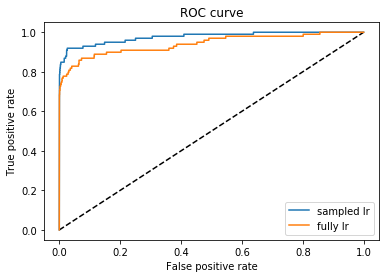

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_sample, tpr_sample, label='sampled lr')
plt.plot(fpr_full, tpr_full, label='fully lr')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()